# **Import Libraries**

In [323]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout
sns.set()

# **Load Dataset**

In [291]:
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


# **Dropped NULL Values**

In [292]:
n=df.isnull().sum()
print(n)
df=df.dropna()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# **Shape of the Dataset**

In [293]:
df.shape

(2000, 9)

# **Correlation Analysis**

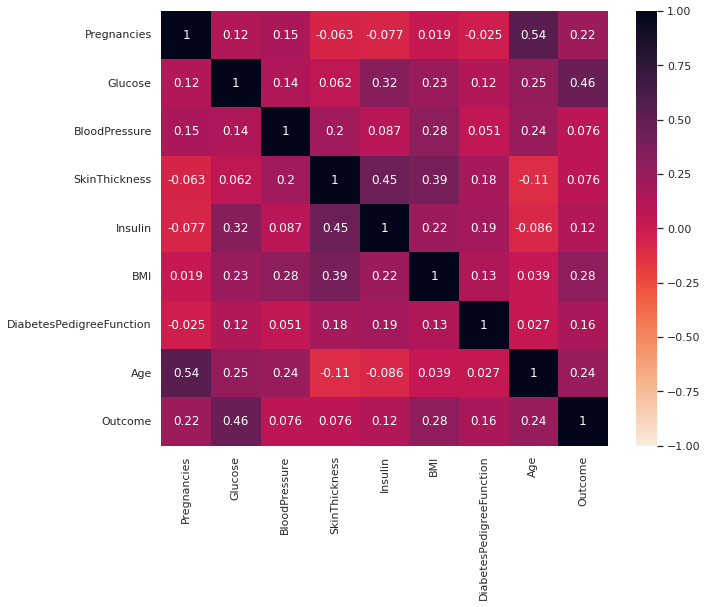

In [294]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(),vmin=-1, vmax=1,annot=True,cmap="rocket_r", ax=ax)
plt.show()

# **Outlier Detection and Remove**

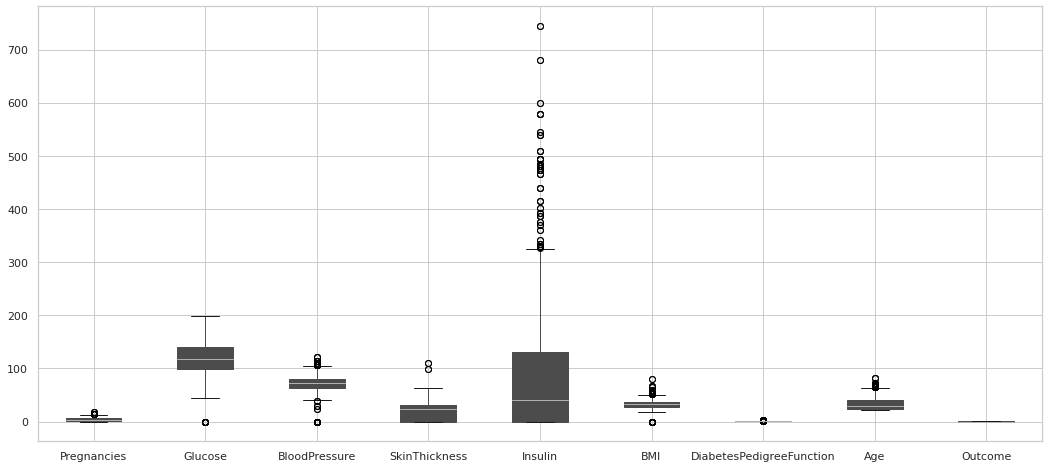

In [295]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(18,8))
boxplot = df.boxplot(patch_artist=True, ax=ax)
plt.show()

In [296]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df['Outcome'].value_counts()


0    1136
1     516
Name: Outcome, dtype: int64

# **Countplot**

<AxesSubplot:xlabel='Outcome', ylabel='count'>

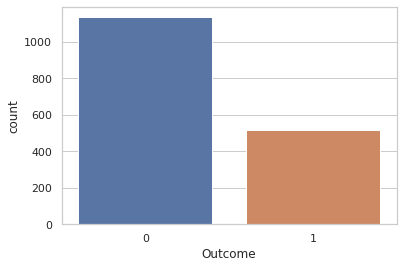

In [297]:
sns.countplot(x='Outcome', data=df)

# **Normalization**

In [298]:
cols = df.columns

In [299]:
ms=MinMaxScaler()
df=ms.fit_transform(df)
df=pd.DataFrame(df,columns=cols)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.153846,0.610390,0.34375,0.583333,0.000000,0.473846,0.044025,0.604651,1.0
1,0.000000,0.259740,0.65625,0.516667,0.384615,0.615385,0.139263,0.046512,0.0
2,0.000000,0.590909,0.43750,0.700000,0.769231,0.741538,0.257862,0.069767,1.0
3,0.000000,0.837662,0.59375,0.533333,0.815385,0.870769,0.971249,0.860465,0.0
4,0.307692,0.357143,0.50000,0.283333,0.000000,0.227692,0.194070,0.162791,0.0
...,...,...,...,...,...,...,...,...,...
1647,0.076923,0.227273,0.31250,0.700000,0.147692,0.778462,0.539084,0.046512,0.0
1648,0.153846,0.201299,0.37500,0.400000,0.169231,0.353846,0.262354,0.279070,0.0
1649,0.615385,0.876623,0.50000,0.700000,0.400000,0.446154,0.575921,0.348837,1.0
1650,0.461538,0.266234,0.59375,0.000000,0.000000,0.400000,0.273136,0.488372,0.0


# Extracting Dependent and Independent Variable



In [301]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

# **Split Dataset Into Train Data, Test Data**

In [302]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# **Logistic Regression**

In [303]:
lr = LogisticRegression(C=1,max_iter=100)
lr.fit(X_train, Y_train)
y_pred1 = lr.predict(X_test)
print(f"Accuracy: ", accuracy_score(y_pred1, Y_test)*100,'%')
print(classification_report(Y_test, y_pred1))

Accuracy:  77.72397094430993 %
              precision    recall  f1-score   support

         0.0       0.79      0.91      0.84       273
         1.0       0.75      0.51      0.61       140

    accuracy                           0.78       413
   macro avg       0.77      0.71      0.73       413
weighted avg       0.77      0.78      0.76       413



In [322]:
scores = cross_val_score(lr, X_train,Y_train, cv=10)  
print(f"Accuracy: ",accuracy_score(Y_test,y_pred1)*100,'%')
print ("Cross-validated scores:", scores)

Accuracy:  77.72397094430993 %
Cross-validated scores: [0.80645161 0.76612903 0.75806452 0.77419355 0.73387097 0.83064516
 0.83870968 0.81451613 0.79032258 0.79674797]


# **Support Vector Classification**

In [304]:
svmc = SVC()
svmc.fit(X_train, Y_train)
y_pred2= svmc.predict(X_test)
print(f'Accuracy: ', accuracy_score(y_pred2, Y_test)*100,'%' ) 
print(classification_report(Y_test, y_pred2))

Accuracy:  82.08232445520581 %
              precision    recall  f1-score   support

         0.0       0.82      0.94      0.87       273
         1.0       0.83      0.59      0.69       140

    accuracy                           0.82       413
   macro avg       0.82      0.77      0.78       413
weighted avg       0.82      0.82      0.81       413



In [321]:
scores = cross_val_score(svmc, X_train,Y_train, cv=10)  
print(f"Accuracy: ",accuracy_score(Y_test,y_pred2)*100,'%')
print ("Cross-validated scores:", scores)

Accuracy:  82.08232445520581 %
Cross-validated scores: [0.77419355 0.82258065 0.81451613 0.84677419 0.81451613 0.80645161
 0.84677419 0.81451613 0.83064516 0.78861789]


# **Random Forest**

In [305]:
rf = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42, class_weight='balanced')
rf.fit(X_train,Y_train)
y_pred3= rf.predict(X_test)
print(f'Accuracy: ', accuracy_score(y_pred3, Y_test)*100,'%' ) 
print(classification_report(Y_test, y_pred3))

Accuracy:  98.78934624697337 %
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       273
         1.0       1.00      0.96      0.98       140

    accuracy                           0.99       413
   macro avg       0.99      0.98      0.99       413
weighted avg       0.99      0.99      0.99       413



In [314]:
scores = cross_val_score(rf, X_train,Y_train, cv=10)  
print(f"Accuracy: ",accuracy_score(Y_test,y_pred3)*100,'%')
print ("Cross-validated scores:", scores)

Accuracy:  98.78934624697337 %
Cross-validated scores: [0.94354839 0.9516129  0.95967742 0.96774194 0.92741935 0.94354839
 0.99193548 0.95967742 0.98387097 0.97560976]


# **Gradient Boosting Classifier**

In [306]:
gbc = GradientBoostingClassifier(n_estimators=500, max_features=1, max_depth=9, random_state=42, verbose=1)
gbc.fit(X_train, Y_train)
y_pred4 = gbc.predict(X_test)
print(f'Accuracy: ',accuracy_score(Y_test, y_pred4)*100,'%')
print(classification_report(Y_test, y_pred4))

      Iter       Train Loss   Remaining Time 
         1           1.0925            4.39s
         2           0.9842            4.19s
         3           0.8934            4.25s
         4           0.8136            4.41s
         5           0.7418            4.40s
         6           0.6743            4.74s
         7           0.6199            4.79s
         8           0.5704            4.78s
         9           0.5330            4.72s
        10           0.4909            4.86s
        20           0.2343            4.43s
        30           0.1288            4.47s
        40           0.0722            4.37s
        50           0.0408            4.25s
        60           0.0234            4.10s
        70           0.0142            3.89s
        80           0.0084            3.76s
        90           0.0052            3.62s
       100           0.0032            3.48s
       200           0.0000            2.56s
       300           0.0000            1.68s
       40

In [315]:
scores = cross_val_score(gbc, X_train,Y_train, cv=10)  
print(f"Accuracy: ",accuracy_score(Y_test,y_pred4)*100,'%')
print ("Cross-validated scores:", scores)

      Iter       Train Loss   Remaining Time 
         1           1.0900            4.08s
         2           0.9812            4.61s
         3           0.8768            5.89s
         4           0.7978            6.30s
         5           0.7366            6.71s
         6           0.6684            6.97s
         7           0.6233            6.94s
         8           0.5785            7.40s
         9           0.5361            7.41s
        10           0.4899            7.54s
        20           0.2402            7.26s
        30           0.1281            6.99s
        40           0.0694            6.53s
        50           0.0400            5.78s
        60           0.0236            5.28s
        70           0.0140            4.95s
        80           0.0086            4.60s
        90           0.0056            4.31s
       100           0.0034            4.09s
       200           0.0000            2.77s
       300           0.0000            1.76s
       40

# **Ensemble Classifier**

In [307]:
mnb = MultinomialNB()
rfc= RandomForestClassifier(n_estimators=1000, max_depth=15, random_state=42)
lr = LogisticRegression(C = 1, max_iter = 1000, n_jobs=-1)
svc = SVC(probability=True)
ec=VotingClassifier(estimators=[('Multinominal NB', mnb), ('Random Forest', rfc),('Logistic Regression',lr),('Support Vector Machine',svc)], voting='soft', weights=[1,1,1,1]) 
ec.fit(X_train,Y_train)                                                 
y_pred5 = ec.predict(X_test)
print(f"Accuracy: ",accuracy_score(Y_test, y_pred5)*100,'%')
print(classification_report(Y_test, y_pred5))

Accuracy:  85.4721549636804 %
              precision    recall  f1-score   support

         0.0       0.83      0.97      0.90       273
         1.0       0.93      0.62      0.74       140

    accuracy                           0.85       413
   macro avg       0.88      0.80      0.82       413
weighted avg       0.86      0.85      0.85       413



In [316]:
scores = cross_val_score(ec, X_train,Y_train, cv=10)  
print(f"Accuracy: ",accuracy_score(Y_test,y_pred5)*100,'%')
print ("Cross-validated scores:", scores)

Accuracy:  85.4721549636804 %
Cross-validated scores: [0.86290323 0.84677419 0.87096774 0.85483871 0.85483871 0.87096774
 0.86290323 0.88709677 0.87096774 0.83739837]


# **AdaBoost Classifier**

In [319]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=14, random_state=42)
abc= AdaBoostClassifier(estimator=rfc, learning_rate=0.2, n_estimators=100)
abc.fit(X_train, Y_train)                                                   
y_pred6= abc.predict(X_test)
print(f"Accuracy: ",accuracy_score(Y_test, y_pred6)*100,'%')
print(classification_report(Y_test, y_pred6))

Accuracy:  98.06295399515739 %
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       273
         1.0       1.00      0.94      0.97       140

    accuracy                           0.98       413
   macro avg       0.99      0.97      0.98       413
weighted avg       0.98      0.98      0.98       413



In [320]:
scores = cross_val_score(abc, X_train,Y_train, cv=10)  
print(f"Accuracy: ",accuracy_score(Y_test,y_pred6)*100,'%')
print ("Cross-validated scores:", scores)

Accuracy:  98.06295399515739 %
Cross-validated scores: [0.94354839 0.9516129  0.9516129  0.96774194 0.9516129  0.96774194
 0.99193548 0.97580645 0.98387097 0.97560976]


# **Model Comparision**

In [309]:
Model_Comparison = pd.DataFrame({'Logistic Regression': [accuracy_score(Y_test,y_pred1)*100,f1_score(Y_test,y_pred1,average='macro')*100,recall_score(Y_test, y_pred1,average='micro')*100,precision_score(Y_test, y_pred1,average='micro')*100],
                            'SVM':[accuracy_score(Y_test,y_pred2)*100,f1_score(Y_test,y_pred2,average='macro')*100,recall_score(Y_test, y_pred2,average='micro')*100,precision_score(Y_test, y_pred2,average='micro')*100],
                           'Random Forest':[accuracy_score(Y_test,y_pred4)*100,f1_score(Y_test,y_pred3,average='macro')*100,recall_score(Y_test, y_pred3,average='micro')*100,precision_score(Y_test, y_pred3,average='micro')*100],
                           'GradientBoosting':[accuracy_score(Y_test,y_pred4)*100,f1_score(Y_test,y_pred4,average='macro')*100,recall_score(Y_test, y_pred4,average='micro')*100,precision_score(Y_test, y_pred4,average='micro')*100],
                           'Ensembled':[accuracy_score(Y_test,y_pred5)*100,f1_score(Y_test,y_pred5,average='macro')*100,recall_score(Y_test, y_pred5,average='micro')*100,precision_score(Y_test, y_pred5,average='micro')*100],
                           'Adaboost':[accuracy_score(Y_test,y_pred6)*100,f1_score(Y_test,y_pred6,average='macro')*100,recall_score(Y_test, y_pred6,average='micro')*100,precision_score(Y_test, y_pred6,average='micro')*100],
})

In [310]:
print ('Model Comparison') 
Model_Comparison.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
Model_Comparison.head()

Model Comparison


,Logistic Regression,SVM,Random Forest,GradientBoosting,Ensembled,Adaboost
Accuracy,77.723971,82.082324,98.062954,98.062954,85.472155,98.062954
F1_score,72.711864,78.269340,98.637189,97.807390,82.111920,97.807390
Recall,77.723971,82.082324,98.789346,98.062954,85.472155,98.062954
Precision,77.723971,82.082324,98.789346,98.062954,85.472155,98.062954


In [343]:
# Sequential Model
model = Sequential()

# Add Input Layer and Hidden Layer
model.add(Dense(256, input_shape=(8,), activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile the Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Model Summary
print(model.summary())

# Train the Model
model.fit(X_train, Y_train, epochs=300, batch_size=16, validation_split=0.1)

# Evaluate the Model on Test Data
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 256)               2304      
                                                                 
 dropout_42 (Dropout)        (None, 256)               0         
                                                                 
 dense_54 (Dense)            (None, 128)               32896     
                                                                 
 dropout_43 (Dropout)        (None, 128)               0         
                                                                 
 dense_55 (Dense)            (None, 64)                8256      
                                                                 
 dropout_44 (Dropout)        (None, 64)                0         
                                                                 
 dense_56 (Dense)            (None, 32)              